In [40]:
#Importing and uploading data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

bids = pd.DataFrame.from_csv('C:/Users/Christopher Gardner/Documents/Python Scripts/bids.csv')
train = pd.DataFrame.from_csv('C:/Users/Christopher Gardner/Documents/Python Scripts/train.csv')

#adding final time features created by subtracting bid time from the last time in the auction. 
test_df = pd.DataFrame.from_csv('C:/Users/Christopher Gardner/Documents/Python Scripts/final_times.csv')
test_df.columns = ['f_time']
bids = bids.merge(test_df, left_on='auction', right_index=True)
test_df = pd.DataFrame.from_csv('C:/Users/Christopher Gardner/Documents/Python Scripts/short_times.csv')
test_df.columns = ['short_time']
bids = bids.merge(test_df, left_on='bidder_id', right_index=True)
bids['diff_time'] = bids.f_time - bids.time
#create proper merge
groupfirst = bids.groupby(bids.bidder_id).nunique().sort_index()
mergedsecond = groupfirst.merge(train.sort_index(), left_index=True, right_index=True)

#now sort by desired values, update ranking and then split into bots and humans for plotting
mergedsecond = mergedsecond.sort_values(by=['auction'])
mergedsecond['ranking'] = np.arange(len(mergedsecond))
mergedsecond['bids_per_auction'] = mergedsecond.time/mergedsecond.auction
bots = mergedsecond[mergedsecond.outcome==1]
humans = mergedsecond[mergedsecond.outcome==0]


#mergefirst
mergedfirst = bids.merge(train, left_on='bidder_id', right_index=True)
groupedsecond = mergedfirst.groupby('bidder_id').nunique()

In [35]:
bots.drop(['payment_account', 'address'], axis=1).head()

,bidder_id,auction,merchandise,device,time,country,ip,url,f_time,short_time,diff_time,outcome,ranking,bids_per_auction
bidder_id,,,,,,,,,,,,,,
7fab82fa5eaea6a44eb743bc4bf356b3tarle,1,1,1,1,1,1,1,1,1,1,1,1.0,44,1.0
74a35c4376559c911fdb5e9cfb78c5e4btqew,1,1,1,1,1,1,1,1,1,1,1,1.0,74,1.0
f35082c6d72f1f1be3dd23f949db1f577t6wd,1,1,1,1,1,1,1,1,1,1,1,1.0,209,1.0
91c749114e26abdb9a4536169f9b4580huern,1,1,1,1,1,1,1,1,1,1,1,1.0,269,1.0
bd0071b98d9479130e5c053a244fe6f1muj8h,1,1,1,1,1,1,1,1,1,1,1,1.0,290,1.0


In [9]:
humans.drop(['payment_account', 'address'], axis=1).head()

,bidder_id,auction,merchandise,device,time,country,ip,url,f_time,diff_time,outcome,ranking,bids_per_auction
bidder_id,,,,,,,,,,,,,
001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1,1,1,0.0,0,1.0
6394edfbd35aab54801518835e33ed50hcr5f,1,1,1,1,1,1,1,1,1,1,0.0,1,1.0
640f41f27c03aca0c45775eb918b666cnjsqv,1,1,1,1,1,1,1,1,1,1,0.0,2,1.0
64f6b099082e4fb2e8da7ba4ae9abdead2cej,1,1,1,2,2,1,2,1,1,2,0.0,3,2.0
6531bde8d4decd9708ff4407ef95e887a26yi,1,1,1,1,1,1,1,1,1,1,0.0,4,1.0


In [37]:
bids.groupby('bidder_id').nunique().head()

,bidder_id,auction,merchandise,device,time,country,ip,url,f_time,short_time,diff_time
bidder_id,,,,,,,,,,,
001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1,1,1,1
002d229ffb247009810828f648afc2ef593rb,1,1,1,2,2,1,1,1,1,1,2
0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1,1,1,1
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1,3,1,3,3,1,3,2,3,1,3
00486a11dff552c4bd7696265724ff81yeo9v,1,13,1,8,20,1,10,7,13,1,20


In [43]:
#function for showing hists and p-values between bots and humans
def HistnP(s, bins):
    '''str argument is the column value to be evaluated
    bins sets the bis of the histograms'''
    plt.subplot(211)
    plt.title('Frequency of bidders using different {}s'.format(s))
    plt.hist(bots[s], color='b', range=(0,bins), bins=100)
    plt.legend('Bots')
    plt.subplot(212)
    plt.hist(humans[s], color='r', range=(0,bins), bins=100)
    plt.legend('Humans')
    plt.xlabel('Number of different {}s'.format(s))
    plt.ylabel('Number of Bidders')
    plt.show()
    print ('p-value: ', stats.ttest_ind(bots[s], humans[s])[1])

In [41]:
print ('p-value: ', stats.ttest_ind(mergedfirst.short_time[mergedfirst.outcome==1], mergedfirst.short_time[mergedfirst.outcome==0])[1])

p-value:  0.0


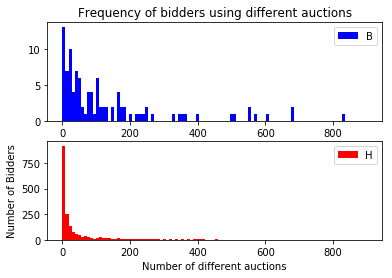

p-value:  4.70629817678e-09


In [165]:
HistnP('auction', 900)

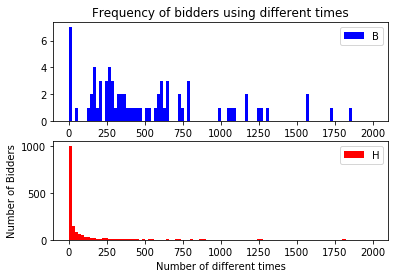

p-value:  0.0103626011864


In [259]:
HistnP('time', 2000)

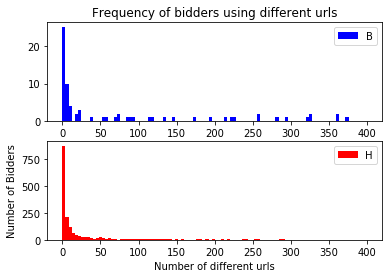

p-value:  0.43967854519


In [257]:
HistnP('url', 400)

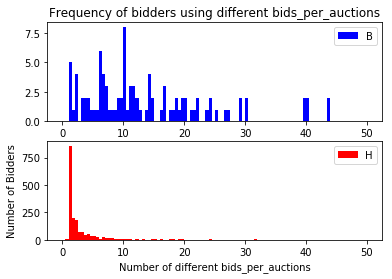

p-value:  1.70803917591e-08


In [256]:
HistnP('bids_per_auction', 50)

In [240]:
country_hu_count = mergedfirst[mergedfirst.outcome == 0].groupby('country').count().bidder_id.sort_values(ascending=False)
country_bot_count = mergedfirst[mergedfirst.outcome == 1].groupby('country').count().bidder_id.sort_values(ascending=False)
total = country_bot_count.add(country_hu_count)
percentage_country = (country_bot_count.divide(total)).sort_values(ascending=False)
percentage_country = percentage_country.append(pd.Series([np.NaN], index=['NaN'])) #need to append a nan value to account for bidders with missing countries
#set to zero to ignore

In [243]:
mergedfirst['percentage_bot_country'] = mergedfirst.country.map(percentage_country)

In [248]:
mergedfirst.head()

,bidder_id,auction,merchandise,device,time,country,ip,url,f_time,diff_time,payment_account,address,outcome,percentage_bot_country
bid_id,,,,,,,,,,,,,,
46,6c8ffec692e88d81e1b18d47818abb04v6llr,ewmzr,home goods,phone8,9759243368421052,us,160.9.191.22,lok9xfe6k6rtv8f,9772874210526315,13630842105263,a3d2de7675556553a5f08e4c88d2c228b0s7q,a3d2de7675556553a5f08e4c88d2c228dehmo,0.0,0.476018
542,6c8ffec692e88d81e1b18d47818abb04v6llr,ewmzr,home goods,phone220,9759246052631578,us,248.126.232.205,pvihxmekpkjv7qy,9772874210526315,13628157894737,a3d2de7675556553a5f08e4c88d2c228b0s7q,a3d2de7675556553a5f08e4c88d2c228dehmo,0.0,0.476018
21046,6c8ffec692e88d81e1b18d47818abb04v6llr,ewmzr,home goods,phone312,9759309000000000,us,122.168.6.174,1bltvi87id7pau1,9772874210526315,13565210526315,a3d2de7675556553a5f08e4c88d2c228b0s7q,a3d2de7675556553a5f08e4c88d2c228dehmo,0.0,0.476018
28545,6c8ffec692e88d81e1b18d47818abb04v6llr,ewmzr,home goods,phone220,9759329736842105,us,48.20.153.251,qt2a8tecr788rdh,9772874210526315,13544473684210,a3d2de7675556553a5f08e4c88d2c228b0s7q,a3d2de7675556553a5f08e4c88d2c228dehmo,0.0,0.476018
31959,6c8ffec692e88d81e1b18d47818abb04v6llr,ewmzr,home goods,phone23,9759339157894736,us,203.208.230.239,vasstdc27m7nks3,9772874210526315,13535052631579,a3d2de7675556553a5f08e4c88d2c228b0s7q,a3d2de7675556553a5f08e4c88d2c228dehmo,0.0,0.476018


In [255]:
plt.hist(mergedfirst[mergedfirst.percentage_bot_country > 0.50].percentage_bot_country)

(array([  3.34380000e+04,   5.90000000e+03,   2.89800000e+04,
          9.00000000e+00,   8.50000000e+01,   2.60000000e+01,
          2.26000000e+02,   8.00000000e+00,   6.98300000e+03,
          8.56200000e+03]),
 array([ 0.52678462,  0.57200826,  0.6172319 ,  0.66245553,  0.70767917,
         0.7529028 ,  0.79812644,  0.84335007,  0.88857371,  0.93379734,
         0.97902098]),
 <a list of 10 Patch objects>)

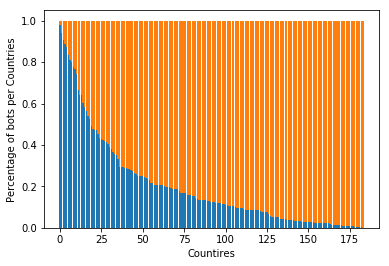

In [10]:
hu_count = mergedfirst[mergedfirst.outcome ==0].groupby('country').count().sort_index()
bot_count = mergedfirst[mergedfirst.outcome ==1].groupby('country').count().sort_index()
total = hu_count + bot_count
hu_count = (hu_count/total).sort_values('bidder_id')
bot_count = (bot_count/total).sort_values('bidder_id', ascending=False)
inds = np.arange(len(hu_count))
plt.title('')
plt.xlabel('Countires')
plt.ylabel('Percentage of bots per Countries')
plt.bar(inds, bot_count.bidder_id)
plt.bar(inds,hu_count.bidder_id, bottom=bot_count.bidder_id)
plt.show()

In [13]:
hu_count.bidder_id.dropna().head()

country
mo    0.020979
jp    0.059152
kr    0.090909
fo    0.111111
je    0.125000
Name: bidder_id, dtype: float64

In [99]:
hu_count = mergedfirst[mergedfirst.outcome ==0].groupby('country').count().sort_index()
bot_count = mergedfirst[mergedfirst.outcome ==1].groupby('country').count().sort_index()
hu_count_list = hu_count.bidder_id.dropna().tolist()
bot_count_list = bot_count.bidder_id.dropna().tolist()
obs = np.array([hu_count_list, bot_count_list])
chi2, p, dof, expected = stats.chi2_contingency(obs)
print (p, 'P-value of 0 means its lower than we can measure and that the null hypothesis is incorrect and we can say with confidence that countryand being a bot is related.')

0.0 P-value of 0 means its lower than we can measure and that the null hypothesis is incorrect and we can say with confidence that countryand being a bot is related.


In [100]:
hu_count_list

[10,
 14330,
 1963,
 3,
 2639,
 470,
 7076,
 10792,
 2445,
 7756,
 8630,
 618,
 43,
 28754,
 2844,
 2638,
 1586,
 1040,
 40,
 980,
 9,
 12814,
 1126,
 26072,
 2,
 9,
 4600,
 616,
 5,
 7804,
 898,
 5,
 97,
 2832,
 385,
 2330,
 5621,
 6198,
 495,
 547,
 347,
 398,
 4503,
 10436,
 1175,
 5009,
 4,
 22,
 4727,
 1613,
 333,
 8267,
 1,
 9213,
 29262,
 5237,
 1796,
 71,
 1,
 9150,
 597,
 3,
 1822,
 118398,
 21,
 458,
 1,
 1544,
 2843,
 13643,
 31,
 86,
 4781,
 70,
 3390,
 258,
 1949,
 153733,
 1604,
 2397,
 559245,
 12223,
 16076,
 90,
 10708,
 1,
 132,
 12912,
 498,
 146322,
 37,
 522,
 634,
 7985,
 84,
 413,
 2731,
 6,
 27589,
 1027,
 391,
 2318,
 267,
 588,
 2276,
 9093,
 581,
 637,
 399,
 542,
 1,
 803,
 1930,
 250,
 33,
 3,
 1,
 2698,
 153,
 1783,
 79,
 3983,
 46438,
 77319,
 1929,
 3063,
 1580,
 345411,
 334,
 4559,
 2253,
 4477,
 1265,
 5159,
 3926,
 1082,
 5,
 289,
 18616,
 22059,
 12382,
 746,
 19,
 1287,
 5909,
 5490,
 8,
 18425,
 20391,
 42774,
 2114,
 26109,
 17,
 232,
 4903,
 279

In [81]:
thres = mergedfirst.groupby('ip').count() > 5000
df = mergedfirst.merge(thres, left_on='ip', right_index=True)
df = df[df.bidder_id_y == True]
print (len(df))
hu_count = df[df.outcome_x ==0].groupby('ip').count().sort_index()
bot_count = df[df.outcome_x ==1].groupby('ip').count().sort_index()
hu_count_list = hu_count.bidder_id_x.dropna().tolist()
bot_count_list = bot_count.bidder_id_x.dropna().tolist()
obs = np.array([hu_count_list, bot_count_list])
chi2, p, dof, expected = stats.chi2_contingency(obs)
print(p)

183832
0.0


In [128]:
thres = mergedfirst.groupby('url').count() > 150
df = mergedfirst.merge(thres, left_on='url', right_index=True)
hu_count = df[df.outcome_x ==0].groupby('url').count().sort_index()
bot_count = df[df.outcome_x ==1].groupby('url').count().sort_index()
hu_count_list = hu_count.bidder_id_x.dropna().tolist()
bot_count_list = bot_count.bidder_id_x.dropna().tolist()
obs = np.array([hu_count_list, bot_count_list])
print (len(hu_count))
chi2, p, dof, expected = stats.chi2_contingency(obs)
print(p)

610031


TypeError: '<' not supported between instances of 'list' and 'int'

594


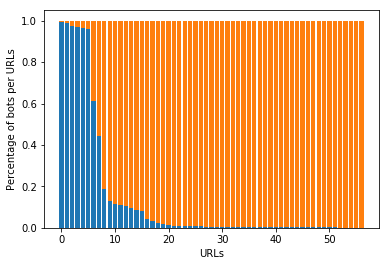

In [127]:
url_thres = mergedfirst.groupby('url').count() > 150
url_df = mergedfirst.merge(url_thres, left_on='url', right_index=True)
url_df = url_df[url_df.bidder_id_y == True]
url_hu_count = url_df[url_df.outcome_x ==0].groupby('url').count().sort_index()
print (len(url_hu_count))
url_bot_count = url_df[url_df.outcome_x ==1].groupby('url').count().sort_index()
total = url_hu_count + url_bot_count
url_hu_count = (url_hu_count/total).sort_values('bidder_id_x')
url_bot_count = (url_bot_count/total).sort_values('bidder_id_x', ascending=False)
inds = np.arange(len(url_hu_count))
plt.title('')
plt.xlabel('URLs')
plt.ylabel('Percentage of bots per URLs')
plt.bar(inds, url_bot_count.bidder_id_x)
plt.bar(inds,url_hu_count.bidder_id_x, bottom=url_bot_count.bidder_id_x)
plt.show()

In [125]:
obs = np.array([url_hu_count.bidder_id_x.dropna().tolist(), url_bot_count.bidder_id_x.dropna().tolist()])
chi2, p, dof, expected = stats.chi2_contingency(obs)
print(chi2, p, dof)

43.1631944543 0.895459378574 56


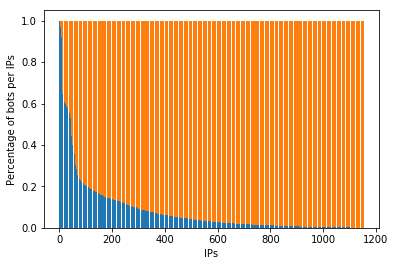

In [118]:
thres = mergedfirst.groupby('ip').count() > 200
df = mergedfirst.merge(thres, left_on='ip', right_index=True)
df = df[df.bidder_id_y == True]
hu_count = df[df.outcome_x ==0].groupby('ip').count().sort_index()
bot_count = df[df.outcome_x ==1].groupby('ip').count().sort_index()
total = hu_count + bot_count
hu_count = (hu_count/total).sort_values('bidder_id_x')
bot_count = (bot_count/total).sort_values('bidder_id_x', ascending=False)
inds = np.arange(len(hu_count))
plt.title('')
plt.xlabel('IPs')
plt.ylabel('Percentage of bots per IPs')
plt.bar(inds, bot_count.bidder_id_x)
plt.bar(inds,hu_count.bidder_id_x, bottom=bot_count.bidder_id_x)
plt.show()

In [120]:
obs = np.array([hu_count.bidder_id_x.dropna().tolist(), bot_count.bidder_id_x.dropna().tolist()])
chi2, p, dof, expected = stats.chi2_contingency(obs)
print(chi2, p, dof)

313.553655157 1.0 1153
